# Housing Price Prediction using ML Algorithms

## Importing modules 

In [1]:
import os, glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDRegressor
from sklearn import ensemble
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Merging data 

In [1]:
# Select the path of the dataset
path = "D:\\MS Data SceinceWork\Machine learning\\Dataset\\"

# Collect all files needed to be combined
all_files = glob.glob(os.path.join(path, "Dataset*.csv"))
# load all selected files into a single DataFrame and converted it back to csv if needed
data_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
#data_merged   = pd.concat(data_from_each_file, ignore_index=True)
#data_merged.to_csv( "D:\\MS Data SceinceWork\Machine learning\\Dataset\\Dataset_merged.csv")

## Loading data from file 

 The merged dataset for Housing Price Pridiction is loaded into Pandas Data Frame.

In [3]:
#data = pd.read_csv('D:\\MS Data SceinceWork\Machine learning\\Dataset\\Dataset_merged.csv')
data = pd.read_csv('D:\\MS Data SceinceWork\Machine learning\\Dataset\\clean dataset.csv')

## Data Exploration 

Then the dataset is explored to get the feel of the dataset. Data analysis is performed as the intial step in order to find the characterization for understanding the nature of the data. Dataset is analysed to  check the dimensions of the dataset. Different features for house price prediction are analysed. Numeric and categorical features of the dataset are analysed. the dataset that needs to analyzed has 120683 rows and 17 columns. The dataset consists of different features that can used to predict the housing price of different sectors in Pakistan.   

In [4]:
# To get the dimentions of the dataset.
data.shape

(120683, 17)

In [5]:
# To get the column names of the dataset
data.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent'],
      dtype='object')

In [6]:
# To get the data types of the different features/ columns
data.dtypes

property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
area             float64
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
dtype: object

In [7]:
# to print the consise summary of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120683 entries, 0 to 120682
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    120683 non-null  int64  
 1   location_id    120683 non-null  int64  
 2   page_url       120683 non-null  object 
 3   property_type  120683 non-null  object 
 4   price          120683 non-null  int64  
 5   location       120683 non-null  object 
 6   city           120683 non-null  object 
 7   province_name  120683 non-null  object 
 8   latitude       120683 non-null  float64
 9   longitude      120683 non-null  float64
 10  baths          120683 non-null  int64  
 11  area           120683 non-null  float64
 12  purpose        120683 non-null  object 
 13  bedrooms       120683 non-null  int64  
 14  date_added     120683 non-null  object 
 15  agency         89167 non-null   object 
 16  agent          89166 non-null   object 
dtypes: float64(3), int64(5), obje

In [8]:
# to compute a summary of statistics pertaining to the DataFrame columns
data.describe()

,property_id,location_id,price,latitude,longitude,baths,area,bedrooms
count,1.206830e+05,120683.000000,1.206830e+05,120683.000000,120683.000000,120683.000000,120683.000000,120683.000000
mean,1.554999e+07,4699.544783,2.474845e+07,29.436119,71.201029,3.087519,10.934462,3.402550
std,2.295199e+06,3817.881716,3.945421e+07,3.679741,3.280656,2.561013,37.830106,1.928411
min,8.657500e+04,1.000000,0.000000e+00,24.749425,31.389173,0.000000,0.100000,0.000000
25%,1.483214e+07,1446.000000,7.400000e+06,24.946375,67.129162,1.000000,4.500000,2.000000
50%,1.661561e+07,3652.000000,1.350000e+07,31.429589,73.073587,3.000000,6.400000,3.000000
75%,1.706843e+07,8288.000000,2.600000e+07,31.585176,74.256549,5.000000,10.000000,5.000000
max,2.647102e+07,14220.000000,2.000000e+09,73.184088,74.564727,403.000000,2302.000000,27.000000


In [9]:
# to check the missing or null values in the data set 
data.isnull().sum()                                                     
miss_val = data.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=data.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/data.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent
agent,31517,26.12
agency,31516,26.11


In [10]:
# drop the columns with highest missing values 
data = data.drop(['agent', 'agency'], axis=1)

In [11]:
# to return the first five rows of the data frame
data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4.0,For Sale,2,2/4/2019
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6,For Sale,3,5/4/2019
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8.0,For Sale,5,7/17/2019
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,20.0,For Sale,4,4/5/2019
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,90.0,For Sale,3,7/10/2019


In [12]:
# to get distinct values present in the Property_type column
data['property_type'].unique()

array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
       'Upper Portion', 'Room'], dtype=object)

In [13]:
# to get distinct values present in the purpose column
data['purpose'].unique()

array(['For Sale'], dtype=object)

In [14]:
# to get distinct values present in the location column
data['location'].unique()

array(['G-10', 'E-11', 'G-15', ..., 'Bokra Road', 'Shahra-e-Liaquat',
       'Sundar'], dtype=object)

In [15]:
# drop rows with any missing values
data.dropna(inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120683 entries, 0 to 120682
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    120683 non-null  int64  
 1   location_id    120683 non-null  int64  
 2   page_url       120683 non-null  object 
 3   property_type  120683 non-null  object 
 4   price          120683 non-null  int64  
 5   location       120683 non-null  object 
 6   city           120683 non-null  object 
 7   province_name  120683 non-null  object 
 8   latitude       120683 non-null  float64
 9   longitude      120683 non-null  float64
 10  baths          120683 non-null  int64  
 11  area           120683 non-null  float64
 12  purpose        120683 non-null  object 
 13  bedrooms       120683 non-null  int64  
 14  date_added     120683 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 14.7+ MB


In [17]:
data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4.0,For Sale,2,2/4/2019
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6,For Sale,3,5/4/2019
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8.0,For Sale,5,7/17/2019
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,20.0,For Sale,4,4/5/2019
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,90.0,For Sale,3,7/10/2019


In [18]:
#  Check the dimension of the dataset
data.shape

(120683, 15)

In [19]:
# extrating the rows for a specific value
data_pred = data.loc[(data['purpose'] == 'For Sale')] 

In [20]:
# Check the dimension of the dataset
data_pred.shape

(120683, 15)

In [21]:
# to return the last rows of the data frame
data_pred.tail()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added
120678,26469753,330,https://www.zameen.com/Property/islamabad_g_13...,House,19500000,G-13,Islamabad,Islamabad,33.648605,72.96236,5,4.4,For Sale,4,28/11/2020
120679,26469338,330,https://www.zameen.com/Property/islamabad_g_13...,House,29000000,G-13,Islamabad,Islamabad,33.648605,72.96236,7,8.0,For Sale,5,28/11/2020
120680,26469257,330,https://www.zameen.com/Property/islamabad_g_13...,House,19500000,G-13,Islamabad,Islamabad,33.648605,72.96236,5,4.4,For Sale,4,28/11/2020
120681,26469055,330,https://www.zameen.com/Property/islamabad_g_13...,House,19000000,G-13,Islamabad,Islamabad,33.648605,72.96236,5,4.4,For Sale,4,28/11/2020
120682,25624351,330,https://www.zameen.com/Property/islamabad_g_13...,House,55000000,G-13,Islamabad,Islamabad,33.648605,72.96236,7,14.2,For Sale,6,28/11/2020


In [22]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'property type'. 
data_pred['property_type']= label_encoder.fit_transform(data_pred['property_type']) 
  
data_property_type = data_pred['property_type'].unique() 
print(data_property_type)

[1 2 4 0 3 6 5]


In [23]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'property type'. 
data_pred['city']= label_encoder.fit_transform(data_pred['city']) 
  
data_property_type = data_pred['city'].unique() 
print(data_property_type)

[1 3 0 4 2]


In [24]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'property type'. 
data_pred['location']= label_encoder.fit_transform(data_pred['location']) 
  
data_property_type = data_pred['location'].unique() 
print(data_property_type)

[ 466  397  471 ...  231 1273 1340]


In [25]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'property type'. 
data_pred['province_name']= label_encoder.fit_transform(data_pred['province_name']) 
  
data_property_type = data_pred['province_name'].unique() 
print(data_property_type)

[1 2 3 0]


There are lots of features in the dataset that are text. Most machine learning models require numerical input features. Since the process of converting text features to a numeric representation an involved task, so only  numeric features are used in price prediction. There is a need to convert data types of some features for simplicity, 

In [26]:
# changing the  data type of column property_type from object to int
data_pred['property_type'] = data_pred['property_type'].astype(np.int64)

In [27]:
# changing the  data type of column price from float to int
data_pred['price'] = data_pred['price'].astype(np.int64)

In [28]:
# changing the  data type of column area from object to float
data_pred['area'] = data_pred['area'].astype(np.float64)

In [29]:
# changing the  data type of column city from object to int
data_pred['city'] = data_pred['city'].astype(np.int64)

In [30]:
# changing the  data type of column location from object to int
data_pred['location'] = data_pred['location'].astype(np.int64)

In [31]:
# changing the  data type of column province_name from object to int
data_pred['province_name'] = data_pred['province_name'].astype(np.int64)

In [32]:
# to print the consise summary of the data set after conversion
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120683 entries, 0 to 120682
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    120683 non-null  int64  
 1   location_id    120683 non-null  int64  
 2   page_url       120683 non-null  object 
 3   property_type  120683 non-null  int64  
 4   price          120683 non-null  int64  
 5   location       120683 non-null  int64  
 6   city           120683 non-null  int64  
 7   province_name  120683 non-null  int64  
 8   latitude       120683 non-null  float64
 9   longitude      120683 non-null  float64
 10  baths          120683 non-null  int64  
 11  area           120683 non-null  float64
 12  purpose        120683 non-null  object 
 13  bedrooms       120683 non-null  int64  
 14  date_added     120683 non-null  object 
dtypes: float64(3), int64(9), object(3)
memory usage: 14.7+ MB


In [33]:
# checking datatypes after conversion 
data_pred.dtypes

property_id        int64
location_id        int64
page_url          object
property_type      int64
price              int64
location           int64
city               int64
province_name      int64
latitude         float64
longitude        float64
baths              int64
area             float64
purpose           object
bedrooms           int64
date_added        object
dtype: object

In [34]:
# Return 98 rows from start
data_pred.head(98)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,1,10000000,466,1,1,33.679890,73.012640,2,4.0,For Sale,2,2/4/2019
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,1,6900000,397,1,1,33.700993,72.971492,3,5.6,For Sale,3,5/4/2019
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,2,16500000,471,1,1,33.631486,72.926559,6,8.0,For Sale,5,7/17/2019
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,2,43500000,202,1,1,33.707573,73.151199,4,20.0,For Sale,4,4/5/2019
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,2,7000000,335,1,1,33.492591,73.301339,3,90.0,For Sale,3,7/10/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,998953,1312,https://www.zameen.com/Property/chaklala_schem...,2,12800000,274,4,2,33.656924,73.143826,0,24.0,For Sale,0,11/6/2018
94,1232114,3046,https://www.zameen.com/Property/bahria_town_ra...,2,37000000,193,4,2,33.555451,73.138218,8,24.0,For Sale,6,7/5/2019
95,1253008,3045,https://www.zameen.com/Property/bahria_town_ra...,2,23000000,193,4,2,33.555594,73.133669,6,36.0,For Sale,5,7/5/2019
96,1273436,3035,https://www.zameen.com/Property/bahria_town_ra...,2,39500000,193,4,2,33.558920,73.118649,7,26.0,For Sale,6,7/5/2019


In [35]:
# identify outliers in the training dataset
outliner_detect = IsolationForest(n_estimators=50, max_samples='auto', contamination=0.1)
outliner_detect.fit(data_pred[['price']])


IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=50,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [36]:
data_pred['scores'] = outliner_detect.decision_function(data_pred[['price']])
data_pred['anamoly'] = outliner_detect.predict(data_pred[['price']])
data_pred.head(70)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,scores,anamoly
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,1,10000000,466,1,1,33.679890,73.012640,2,4.0,For Sale,2,2/4/2019,0.136874,1
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,1,6900000,397,1,1,33.700993,72.971492,3,5.6,For Sale,3,5/4/2019,0.142616,1
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,2,16500000,471,1,1,33.631486,72.926559,6,8.0,For Sale,5,7/17/2019,0.124937,1
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,2,43500000,202,1,1,33.707573,73.151199,4,20.0,For Sale,4,4/5/2019,0.054798,1
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,2,7000000,335,1,1,33.492591,73.301339,3,90.0,For Sale,3,7/10/2019,0.143309,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2510674,9435,https://www.zameen.com/Property/askari_10_aska...,2,23000000,145,3,2,31.533161,74.419481,6,26.0,For Sale,5,6/18/2019,0.116651,1
66,2747251,3749,https://www.zameen.com/Property/eme_society_em...,2,57500000,403,3,2,31.439978,74.209685,5,20.0,For Sale,5,4/3/2019,-0.011298,-1
67,2794766,3794,https://www.zameen.com/Property/gor_gor_1_five...,2,620000000,478,3,2,31.543431,74.344225,8,120.0,For Sale,8,5/3/2019,-0.283971,-1
68,2801879,1494,https://www.zameen.com/Property/lahore_karim_p...,2,5500000,753,3,2,31.590234,74.300365,3,20.0,For Sale,3,6/11/2019,0.138930,1


In [37]:
anamoly = data_pred.loc[data_pred['anamoly'] == -1]
anamoly_index = list(anamoly.index)
print(anamoly)

        property_id  location_id  \
12          1623818         3300   
17          2230469         9057   
19          2384979          424   
22          2651838          340   
28          3098002         3299   
...             ...          ...   
120591     17356979         1447   
120606     17357706         1454   
120628     25982164         3338   
120654     26097312          330   
120659     25953665         3338   

                                                 page_url  property_type  \
12      https://www.zameen.com/Property/f_6_f_6_2_hous...              2   
17      https://www.zameen.com/Property/dha_defence_ph...              2   
19      https://www.zameen.com/Property/islamabad_pwd_...              1   
22      https://www.zameen.com/Property/islamabad_bani...              0   
28      https://www.zameen.com/Property/f_6_f_6_1_bran...              2   
...                                                   ...            ...   
120591  https://www.zameen.com/Prop

In [ ]:
data_pred = data_pred[data_pred.anamoly   == 1]

In [ ]:
data_pred.head(10)

In [ ]:
data_pred.shape

## Spliting Dataset into Training and Testing 

Before starting modeling of the data, the dataset needs to be split  into training and test sets. Training sets are used to train the models while testing sets are used to cross-validate the model. Varaible X is independent consisting of 9 different features while Y is dependent variable which has price feature which needs to be predicted.

In [38]:
X = data_pred[['property_type', 'area', 'city', 'baths', 'bedrooms', 'location', 'province_name', 'latitude', 'longitude']]
Y = data_pred['price']

The dataset is split into two tests by using train_test_split.The Training set had 75% data and testing set has 25% data.

In [39]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=.25, random_state=3)

## ExtraTreesRegressor 

An extra-trees regressor implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [40]:
reg = ExtraTreesRegressor(n_estimators=1000, random_state=0)
reg.fit(x_train, y_train) # Build a forest of trees from the training set (X, Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=1000, n_jobs=None, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)

In [42]:
#Calculating train/test scores - R-squared value 
print("Accuracy/ R-squared value Training Set:  ", reg.score(x_train, y_train))
print("Accuracy/ R-squared value Testing Set:  ", reg.score(x_test, y_test))

Accuracy/ R-squared value Training Set:   0.9782866513552708
Accuracy/ R-squared value Testing Set:   0.7656347352112036


Cross-validation is a statistical method used to estimate the skill of machine learning models.
It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods. Here K-folds cross validation is used to compute the results.

In [43]:
# Calcultion of Cross Validation
reg_cv = cross_val_score(reg,X, Y, cv = 5, scoring = 'r2')
print("Cross Validation : ", reg_cv.mean())

Cross Validation :  0.7188164062868305


In [44]:
predictions_test = reg.predict(x_test)
predictions_train = reg.predict(x_train)

In [45]:
# Calculation of Mean Squared Error for testing and training data
mse_train = np.mean((predictions_train - y_train)**2)
print("Mean Squared Error MSE on Training set: ", mse_train )

mse_test = np.mean((predictions_test - y_test)**2)
print("Mean Squared Error MSE on Testing set: ", mse_test )

Mean Squared Error MSE on Training set:  33580494665971.418
Mean Squared Error MSE on Testing set:  371899054633419.44


In [46]:
# Calculate the root mean square error (RMSE) for testing and training data
N = len(y_test)
rmse_test = np.sqrt(np.sum((np.array(y_test).flatten() - np.array(predictions_test).flatten())**2)/N)
print("Root-Mean-Squared-Error RMSE on Training set: ", rmse_test)     

N = len(y_train)
rmse_train = np.sqrt(np.sum((np.array(y_train).flatten() - np.array(predictions_train).flatten())**2)/N)
print("Root-Mean-Squared-Error RMSE on Testing set: ", rmse_train)  

Root-Mean-Squared-Error RMSE on Training set:  19284684.457709596
Root-Mean-Squared-Error RMSE on Testing set:  5794867.959321729


In [47]:
#Calulate the Mean absolute error for testing and training data
mae_train = mean_absolute_error(y_train, predictions_train)
print("Mean-Absolute-Error MAE on Training set: ", mae_train) 

mae_test = mean_absolute_error(y_test, predictions_test)
print("Mean-Absolute-Error MAE on Testing set: ", mae_test) 


Mean-Absolute-Error MAE on Training set:  1605717.3591023944
Mean-Absolute-Error MAE on Testing set:  5104354.183380352


In [48]:
# calculate r2 score 
r2 = r2_score(y_test, predictions_test)
print("R² or Coefficient of Determination on Testing set: ", r2) 


R² or Coefficient of Determination on Testing set:  0.7656347352112036


In [49]:
# adjusted r2 using formula adj_r2 = 1 - (1- r2) * (n-1) / (n - k - 1)
# k = number of predictors = data.shape[1] - 1
adj_r2 = 1 - (1-r2)*(len(data) - 1) / (len(data) - (data.shape[1] - 1) - 1)
print("Adjusted R² on Testing set: ", adj_r2)

Adjusted R² on Testing set:  0.765607543961601


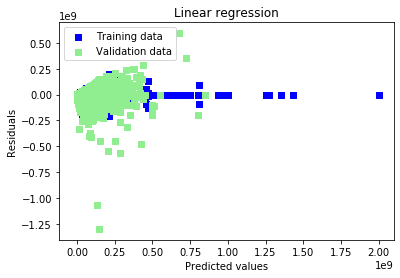

In [50]:
# Plot residuals
plt.scatter(predictions_train, predictions_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(predictions_test, predictions_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.hlines(y = 0, xmin, xmax, color = "red")
plt.show()

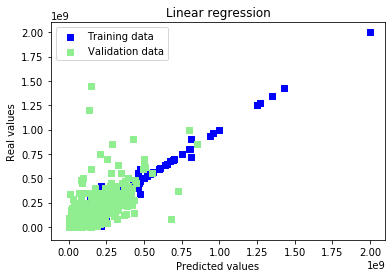

In [51]:
# Plot predictions
plt.scatter(predictions_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(predictions_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0.00, 2.00], [0.00, 2.00], c = "red")
plt.show()

In [ ]:
plt.scatter(y_test, predictions_test)
plt.plot(range(999999999), range(999999999))

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

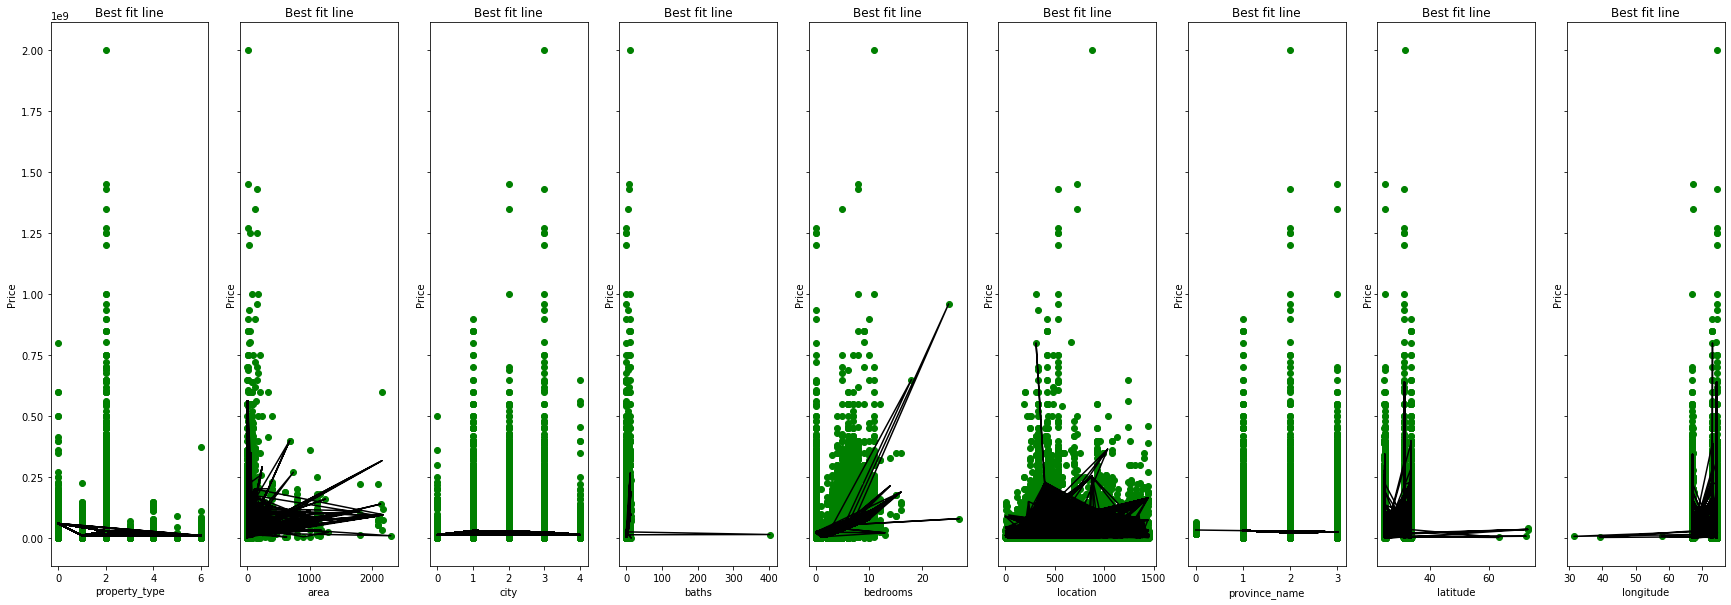

In [52]:
# Ploting Scatter plots for model for different features of Housing dataset
fig, axes = plt.subplots(1,len(X.columns.values),sharey=True,constrained_layout=False,figsize=(30,10))

for i,e in enumerate(X.columns): 
  reg.fit(X[e].values[:,np.newaxis], Y.values)
  axes[i].set_title("Best fit line")
  axes[i].set_xlabel(str(e))
  axes[i].set_ylabel('Price')
  axes[i].scatter(X[e].values[:,np.newaxis], Y,color='g')
  axes[i].plot(X[e].values[:,np.newaxis], 
  reg.predict(X[e].values[:,np.newaxis]),color='k')

## Random Forest

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [53]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train) #Build a forest of trees from the training set (X, y).


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
#Calculating train/test scores - R-squared value 
print("Accuracy/ R-squared value Training Set:  ", rfr.score(x_train, y_train))
print("Accuracy/ R-squared value Testing Set:  ", rfr.score(x_test, y_test))

Accuracy/ R-squared value Training Set:   0.9448345913693199
Accuracy/ R-squared value Testing Set:   0.7448683124824355


In [55]:
# Calcultion of Cross Validation
rfr_cv = cross_val_score(rfr,X, Y, cv = 5, scoring = 'r2')
print("Cross Validation: ", rfr_cv.mean())

Cross Validation:  0.6937091427913602


In [56]:
# Random forest determined feature importances
rfr.feature_importances_

array([0.02706604, 0.48413933, 0.00341601, 0.02960365, 0.06838997,
       0.03779376, 0.00065319, 0.20101712, 0.14792092])

In [57]:
importance = rfr.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X.columns)
#list(feature_importances)

sorted_feature_importances = sorted(feature_importances, reverse = True)
#print(sorted_feature_importances)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['area', 'latitude', 'longitude', 'bedrooms', 'location', 'baths', 'property_type', 'city', 'province_name']


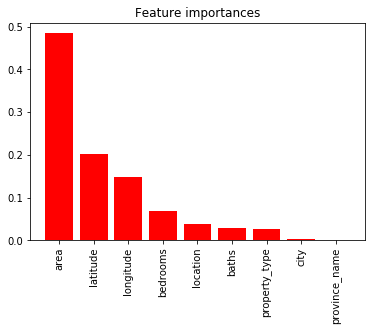

In [58]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

In [59]:
predictions_test = rfr.predict(x_test)
predictions_train = rfr.predict(x_train)

In [60]:
# Calculate the Mean Squared Error for testing and training data
mse_train = np.mean((predictions_train - y_train)**2)
print("Mean Squared Error MSE on Training set: ", mse_train )

mse_test = np.mean((predictions_test - y_test)**2)
print("Mean Squared Error MSE on Testing set: ", mse_test )

Mean Squared Error MSE on Training set:  85315339452190.81
Mean Squared Error MSE on Testing set:  404851945446439.0


In [61]:
# Calculate the root mean square error (RMSE) for testing and training data
N = len(y_test)
rmse_test = np.sqrt(np.sum((np.array(y_test).flatten() - np.array(predictions_test).flatten())**2)/N)
print("Root-Mean-Squared-Error RMSE on Training set: ", rmse_test)     

N = len(y_train)
rmse_train = np.sqrt(np.sum((np.array(y_train).flatten() - np.array(predictions_train).flatten())**2)/N)
print("Root-Mean-Squared-Error RMSE on Testing set: ", rmse_train)  


Root-Mean-Squared-Error RMSE on Training set:  20120933.016300067
Root-Mean-Squared-Error RMSE on Testing set:  9236630.30829909


In [62]:
# Calculate the mean absoulte error for testing and training data
mae_train = mean_absolute_error(y_train, predictions_train)
print("Mean-Absolute-Error MAE on Training set: ", mae_train) 

mae_test = mean_absolute_error(y_test, predictions_test)
print("Mean-Absolute-Error MAE on Testing set: ", mae_test) 


Mean-Absolute-Error MAE on Training set:  2784106.1956508774
Mean-Absolute-Error MAE on Testing set:  5163255.661527236


In [63]:
# calculate r2 score for testing and training data
r2 = r2_score(y_test, predictions_test)
print("R² or Coefficient of Determination on Testing set: ", r2) 

R² or Coefficient of Determination on Testing set:  0.7448683124824355


In [64]:
# adjusted r2 using formula adj_r2 = 1 - (1- r2) * (n-1) / (n - k - 1)
# k = number of predictors = data.shape[1] - 1
adj_r2 = 1 - (1-r2)*(len(data) - 1) / (len(data) - (data.shape[1] - 1) - 1)
print("Adjusted R² on Testing set: ", adj_r2)

Adjusted R² on Testing set:  0.7448387118954924


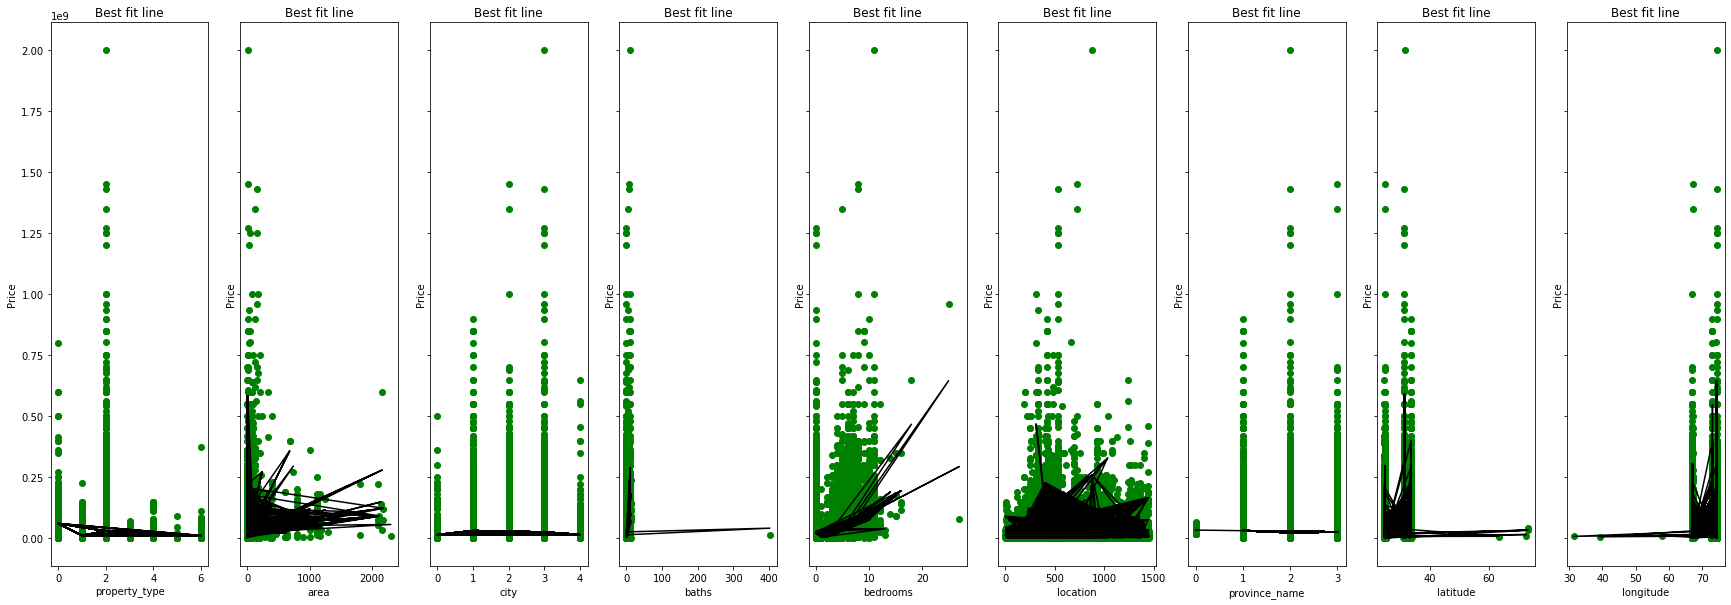

In [65]:
# Ploting scatter plots for different features against price of the house prediction data set
fig, axes = plt.subplots(1,len(X.columns.values),sharey=True,constrained_layout=False,figsize=(30,10))

for i,e in enumerate(X.columns):
  rfr.fit(X[e].values[:,np.newaxis], Y.values)
  axes[i].set_title("Best fit line")
  axes[i].set_xlabel(str(e))
  axes[i].set_ylabel('Price')
  axes[i].scatter(X[e].values[:,np.newaxis], Y,color='g')
  axes[i].plot(X[e].values[:,np.newaxis], 
  rfr.predict(X[e].values[:,np.newaxis]),color='k')

##  GradientBoostingRegressor

Gradient Boosting for regression builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function. The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data and max_features=n_features, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, random_state has to be fixed.

In [66]:
model = ensemble.GradientBoostingRegressor()
model.fit(x_train, y_train) # Fit the gradient boosting model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [67]:
 #Calculating train/test scores - R-squared value 
print("Accuracy/ R-squared value Training Set:  ", model.score(x_train, y_train))
print("Accuracy/ R-squared value Testing Set:  ", model.score(x_test, y_test))

Accuracy/ R-squared value Training Set:   0.6866646777670229
Accuracy/ R-squared value Testing Set:   0.6535135618640908


In [68]:
# Cross Validation on testing set
model_cv = cross_val_score(model,X, Y, cv = 5, scoring = 'r2')
print("R2: ", model_cv.mean())

R2:  0.6320942018429146


In [69]:
predictions_test = model.predict(x_test)
predictions_train = model.predict(x_train)

In [70]:
# Calculate Mean Squared error for testing and training data
mse_train = np.mean((predictions_train - y_train)**2)
print("Mean Squared Error MSE on Training set: ", mse_train )

mse_test = np.mean((predictions_test - y_test)**2)
print("Mean Squared Error MSE on Testing set: ", mse_test )


Mean Squared Error MSE on Training set:  484584634505909.94
Mean Squared Error MSE on Testing set:  549816880509879.7


In [71]:
# Calculate the root mean square error (RMSE) for testing and training data
N = len(y_test)
rmse_test = np.sqrt(np.sum((np.array(y_test).flatten() - np.array(predictions_test).flatten())**2)/N)
print("Root-Mean-Squared-Error RMSE on Training set: ", rmse_test)     

N = len(y_train)
rmse_train = np.sqrt(np.sum((np.array(y_train).flatten() - np.array(predictions_train).flatten())**2)/N)
print("Root-Mean-Squared-Error RMSE on Testing set: ", rmse_train)  


Root-Mean-Squared-Error RMSE on Training set:  23448174.353451878
Root-Mean-Squared-Error RMSE on Testing set:  22013283.137821943


In [72]:
# Calculate the mean absolute error for testing and training data
mae_train = mean_absolute_error(y_train, predictions_train)
print("Mean-Absolute-Error MAE on Training set: ", mae_train) 

mae_test = mean_absolute_error(y_test, predictions_test)
print("Mean-Absolute-Error MAE on Testing set: ", mae_test) 

Mean-Absolute-Error MAE on Training set:  8092705.372944575
Mean-Absolute-Error MAE on Testing set:  8332162.070644314


In [73]:
# calculate r2 score
r2 = r2_score(y_test, predictions_test)
print("R² or Coefficient of Determination on Testing set: ", r2) 

R² or Coefficient of Determination on Testing set:  0.6535135618640908


In [74]:
# adjusted r2 using formula adj_r2 = 1 - (1- r2) * (n-1) / (n - k - 1)
# k = number of predictors = data.shape[1] - 1
adj_r2 = 1 - (1-r2)*(len(data) - 1) / (len(data) - (data.shape[1] - 1) - 1)
print("Adjusted R² on Testing set: ", adj_r2)

Adjusted R² on Testing set:  0.6534733622243032


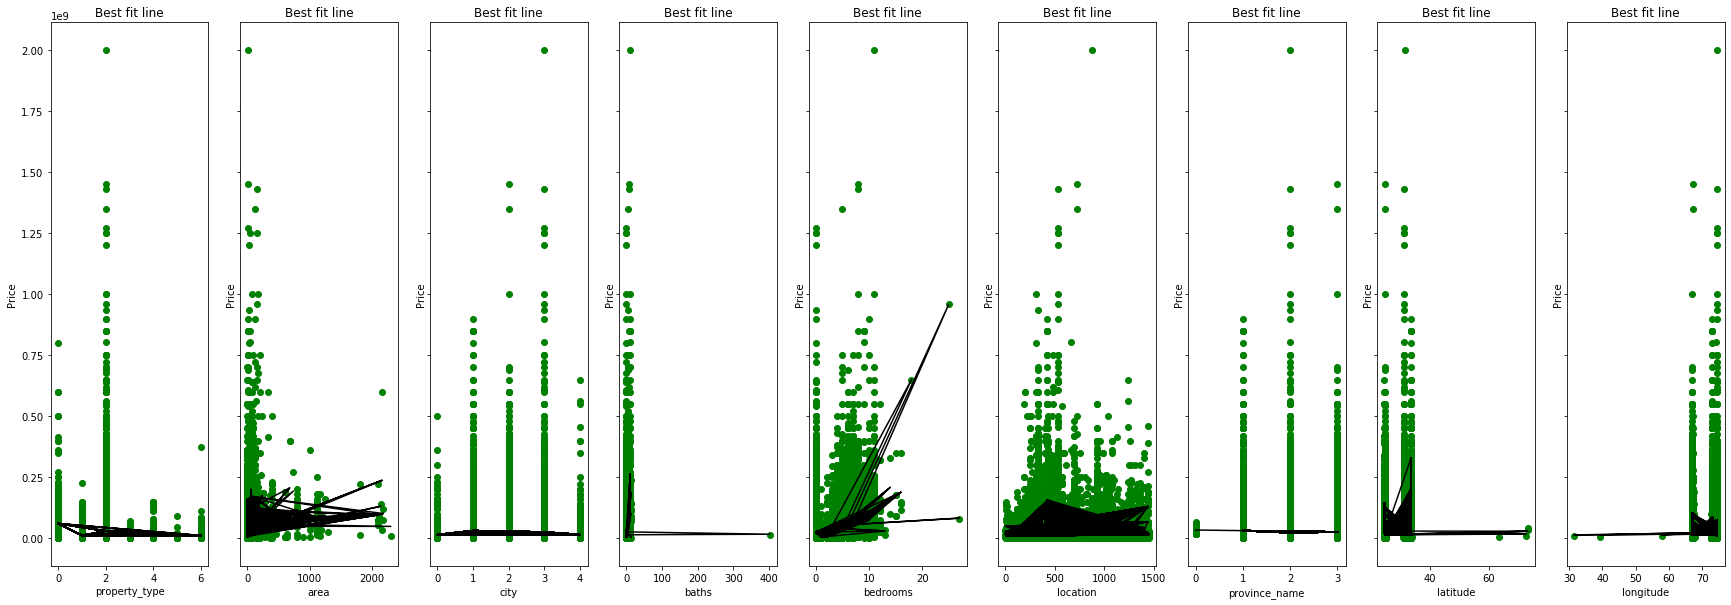

In [75]:
# Plotting Scatters plots for differnt features against price of the dataset
fig, axes = plt.subplots(1,len(X.columns.values),sharey=True,constrained_layout=False,figsize=(30,10))

for i,e in enumerate(X.columns):
  model.fit(X[e].values[:,np.newaxis], Y.values)
  axes[i].set_title("Best fit line")
  axes[i].set_xlabel(str(e))
  axes[i].set_ylabel('Price')
  axes[i].scatter(X[e].values[:,np.newaxis], Y,color='g')
  axes[i].plot(X[e].values[:,np.newaxis], 
  model.predict(X[e].values[:,np.newaxis]),color='k')

## Linear Regression 

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range.LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [77]:
 lin_reg = LinearRegression()

In [78]:
 lin_reg.fit(x_train,y_train) # Fit linear model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
#Calculating train/test scores - R-squared value 
print("Accuracy/ R-squared value Training Set:  ", lin_reg.score(x_train, y_train))
print("Accuracy/ R-squared value Testing Set:  ", lin_reg.score(x_test, y_test))

Accuracy/ R-squared value Training Set:   0.16054868122334798
Accuracy/ R-squared value Testing Set:   0.17106412890600053


In [80]:
lin_reg_cv = cross_val_score(lin_reg,X, Y, cv = 5, scoring = 'r2')
print("Cross-validation results: ", lin_reg_cv.mean())

Cross-validation results:  0.15809970964116746


In [81]:
#Predict using the linear model for testing and training data
predictions_test = lin_reg.predict(x_test)
predictions_train = lin_reg.predict(x_train)

In [82]:
# Calculate mean squared error for testing and training dat
mse_train = np.mean((predictions_train - y_train)**2)
print("Mean Squared Error MSE on Training set: ", mse_train )

mse_test = np.mean((predictions_test - y_test)**2)
print("Mean Squared Error MSE on Testing set: ", mse_test )


Mean Squared Error MSE on Training set:  1298242431130790.0
Mean Squared Error MSE on Testing set:  1315384628730742.5


In [83]:
# Calculate the root mean square error (RMSE) for testing and training data
N = len(y_test)
rmse_test = np.sqrt(np.sum((np.array(y_test).flatten() - np.array(predictions_test).flatten())**2)/N)
print("Root-Mean-Squared-Error RMSE on Training set: ", rmse_test)     

N = len(y_train)
rmse_train = np.sqrt(np.sum((np.array(y_train).flatten() - np.array(predictions_train).flatten())**2)/N)
print("Root-Mean-Squared-Error RMSE on Testing set: ", rmse_train)

Root-Mean-Squared-Error RMSE on Training set:  36268231.67361135
Root-Mean-Squared-Error RMSE on Testing set:  36031131.41619065


In [84]:
# Calculate the mean absoute error for testing and training dat
mae_train = mean_absolute_error(y_train, predictions_train)
print("Mean-Absolute-Error MAE on Training set: ", mae_train) 

mae_test = mean_absolute_error(y_test, predictions_test)
print("Mean-Absolute-Error MAE on Testing set: ", mae_test) 

Mean-Absolute-Error MAE on Training set:  17425921.06069399
Mean-Absolute-Error MAE on Testing set:  17471210.754301466


In [85]:
# calculate r2 score
r2 = r2_score(y_test, predictions_test)
print("R² or Coefficient of Determination on Testing set: ", r2) 

R² or Coefficient of Determination on Testing set:  0.17106412890600053


In [86]:
# adjusted r2 using formula adj_r2 = 1 - (1- r2) * (n-1) / (n - k - 1)
# k = number of predictors = data.shape[1] - 1
adj_r2 = 1 - (1-r2)*(len(data) - 1) / (len(data) - (data.shape[1] - 1) - 1)
print("Adjusted R² on Testing set: ", adj_r2)

Adjusted R² on Testing set:  0.17096795508862295


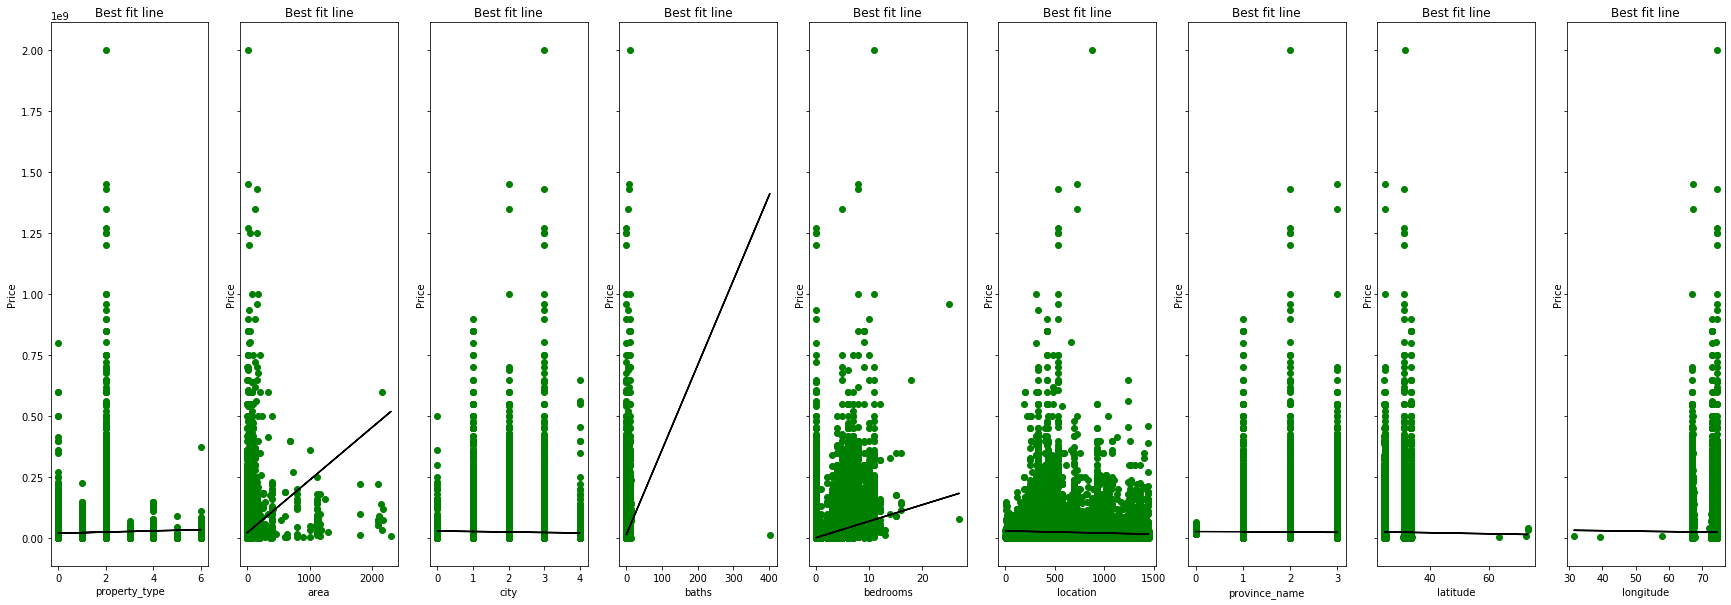

In [87]:
# Plotting scatters plots for different features against price for housing dataset
fig, axes = plt.subplots(1,len(X.columns.values),sharey=True,constrained_layout=False,figsize=(30,10))

for i,e in enumerate(X.columns):
  lin_reg.fit(X[e].values[:,np.newaxis], Y.values)
  axes[i].set_title("Best fit line")
  axes[i].set_xlabel(str(e))
  axes[i].set_ylabel('Price')
  axes[i].scatter(X[e].values[:,np.newaxis], Y,color='g')
  axes[i].plot(X[e].values[:,np.newaxis], 
  lin_reg.predict(X[e].values[:,np.newaxis]),color='k')

## Ridge Regression 

The alpha parameter in ridge and lasso regularizes the regression model. The regression algorithms with regularization differ from linear regression in that they try to penalize those features that are not significant in our prediction. Ridge will try to reduce their effects (i.e., shrink their coeffients) in order to optimize all the input features. Lasso will try to remove the not-significant features by making their coefficients zero. In short, Lasso (L1 regularization) can eliminate the not-significant features, thus performing feature selection while Ridge (L2 regularization) cannot.

In [88]:
ridge = Ridge(alpha = 1)  # sets alpha to a default value as baseline  
ridge.fit(x_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [89]:
#Calculating train/test scores - R-squared value 
print("Accuracy/ R-squared value Training Set:  ", ridge.score(x_train, y_train))
print("Accuracy/ R-squared value Testing Set:  ", ridge.score(x_test, y_test))

Accuracy/ R-squared value Training Set:   0.16054868083355933
Accuracy/ R-squared value Testing Set:   0.1710643237367565


In [90]:
# Calculation of Cross Validation
ridge_cv = cross_val_score(ridge, X, Y, cv = 5, scoring = 'r2')
print ("Cross-validation results: ", ridge_cv)
print ("R2: ", ridge_cv.mean())

Cross-validation results:  [0.13542337 0.15273151 0.16042735 0.16470243 0.1772164 ]
R2:  0.15810021232362023


In [91]:
predictions_test = ridge.predict(x_test)
predictions_train = ridge.predict(x_train)

In [92]:
# Calculation of Mean Squared Error for testing and training data
mse_train = np.mean((predictions_train - y_train)**2)
print("Mean Squared Error MSE on Training set: ", mse_train )

mse_test = np.mean((predictions_test - y_test)**2)
print("Mean Squared Error MSE on Testing set: ", mse_test )


Mean Squared Error MSE on Training set:  1298242431733607.8
Mean Squared Error MSE on Testing set:  1315384319566442.8


In [93]:
# Calculate the root mean square error (RMSE) for testing and training data
N = len(y_test)
rmse_test = np.sqrt(np.sum((np.array(y_test).flatten() - np.array(predictions_test).flatten())**2)/N)
print("Root-Mean-Squared-Error RMSE on Training set: ", rmse_test)     

N = len(y_train)
rmse_train = np.sqrt(np.sum((np.array(y_train).flatten() - np.array(predictions_train).flatten())**2)/N)
print("Root-Mean-Squared-Error RMSE on Testing set: ", rmse_train)

Root-Mean-Squared-Error RMSE on Training set:  36268227.41141951
Root-Mean-Squared-Error RMSE on Testing set:  36031131.42455594


In [94]:
# Calculate mean absolute error for testing and training data
mae_train = mean_absolute_error(y_train, predictions_train)
print("Mean-Absolute-Error MAE on Training set: ", mae_train) 

mae_test = mean_absolute_error(y_test, predictions_test)
print("Mean-Absolute-Error MAE on Testing set: ", mae_test) 

Mean-Absolute-Error MAE on Training set:  17425852.123854153
Mean-Absolute-Error MAE on Testing set:  17471142.28901356


In [95]:
# calculate r2 score
r2 = r2_score(y_test, predictions_test)
print("R² or Coefficient of Determination on Testing set: ", r2) 

R² or Coefficient of Determination on Testing set:  0.1710643237367565


In [96]:
# adjusted r2 using formula adj_r2 = 1 - (1- r2) * (n-1) / (n - k - 1)
# k = number of predictors = data.shape[1] - 1
adj_r2 = 1 - (1-r2)*(len(data) - 1) / (len(data) - (data.shape[1] - 1) - 1)
print("Adjusted R² on Testing set: ", adj_r2)

Adjusted R² on Testing set:  0.1709681499419834


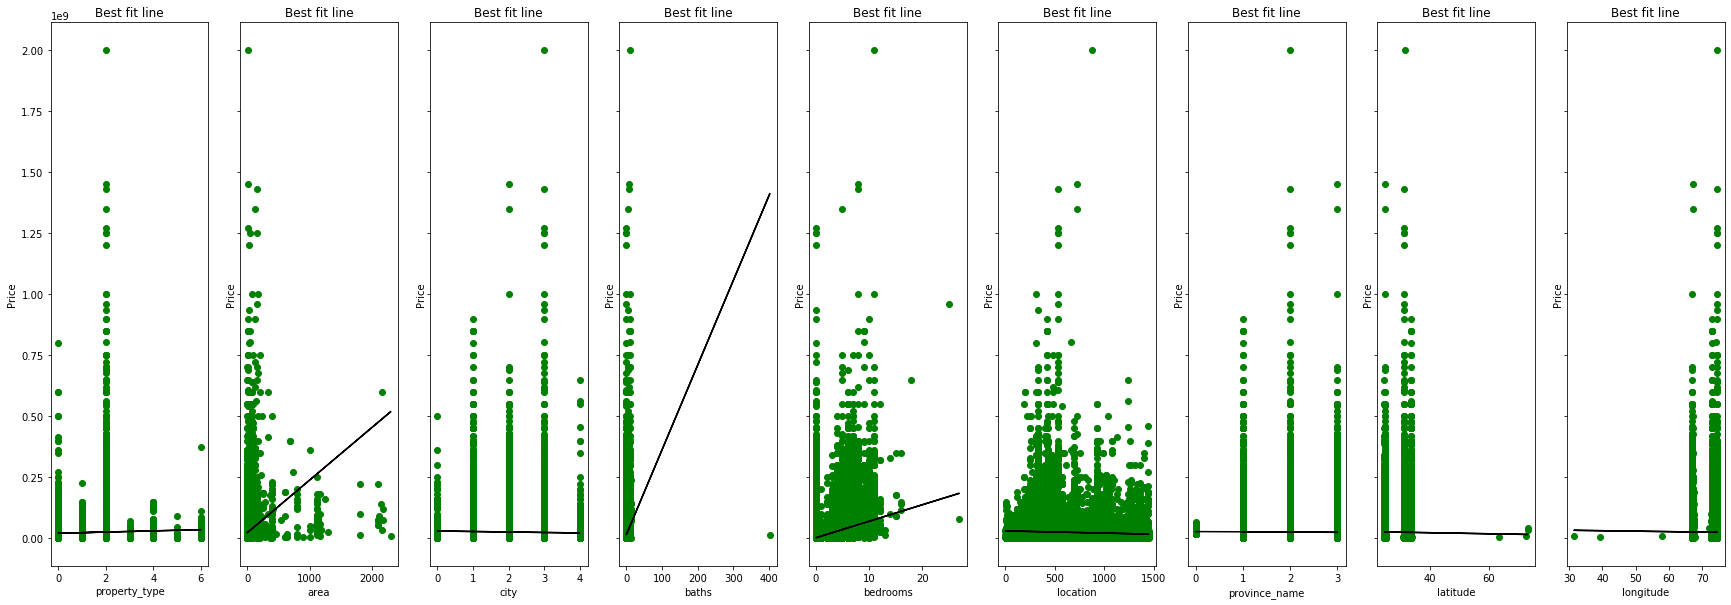

In [97]:
# Plotting scatter plots for different features against price for housing dataset
fig, axes = plt.subplots(1,len(X.columns.values),sharey=True,constrained_layout=False,figsize=(30,10))

for i,e in enumerate(X.columns):
  ridge.fit(X[e].values[:,np.newaxis], Y.values)
  axes[i].set_title("Best fit line")
  axes[i].set_xlabel(str(e))
  axes[i].set_ylabel('Price')
  axes[i].scatter(X[e].values[:,np.newaxis], Y,color='g')
  axes[i].plot(X[e].values[:,np.newaxis], 
  ridge.predict(X[e].values[:,np.newaxis]),color='k')

## Lasso Regression 

In [98]:
lasso = Lasso(alpha = .001)  # sets alpha to almost zero as baseline
lasso.fit(x_train, y_train)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [99]:
#Calculating train/test scores - R-squared value 
print("Accuracy/ R-squared value Training Set:  ", lasso.score(x_train, y_train))
print("Accuracy/ R-squared value Testing Set:  ", lasso.score(x_test, y_test))

Accuracy/ R-squared value Training Set:   0.16054868122334787
Accuracy/ R-squared value Testing Set:   0.171064128907658


In [100]:
# Caluculation of Cross Validation
lasso_cv = cross_val_score(lasso, X, Y, cv = 5, scoring = 'r2')
print ("Cross-validation results: ", lasso_cv)
print ("R2: ", lasso_cv.mean())

Cross-validation results:  [0.13542436 0.15273187 0.16042742 0.1647034  0.1772115 ]
R2:  0.15809970964341813


In [101]:
predictions_test = lasso.predict(x_test)
predictions_train = lasso.predict(x_train)

In [102]:
# Calculation of mean squared error for testing  and training data 
mse_train = np.mean((predictions_train - y_train)**2)
print("Mean Squared Error MSE on Training set: ", mse_train )

mse_test = np.mean((predictions_test - y_test)**2)
print("Mean Squared Error MSE on Testing set: ", mse_test )


Mean Squared Error MSE on Training set:  1298242431130796.2
Mean Squared Error MSE on Testing set:  1315384628728127.2


In [103]:
# Calculate the root mean square error (RMSE) for testing  and training data
N = len(y_test)
rmse_test = np.sqrt(np.sum((np.array(y_test).flatten() - np.array(predictions_test).flatten())**2)/N)
print("Root-Mean-Squared-Error RMSE on Training set: ", rmse_test)     

N = len(y_train)
rmse_train = np.sqrt(np.sum((np.array(y_train).flatten() - np.array(predictions_train).flatten())**2)/N)
print("Root-Mean-Squared-Error RMSE on Testing set: ", rmse_train)

Root-Mean-Squared-Error RMSE on Training set:  36268231.67357509
Root-Mean-Squared-Error RMSE on Testing set:  36031131.41619065


In [104]:
# Calculate mean absolute error for testing  and training data
mae_train = mean_absolute_error(y_train, predictions_train)
print("Mean-Absolute-Error MAE on Training set: ", mae_train) 

mae_test = mean_absolute_error(y_test, predictions_test)
print("Mean-Absolute-Error MAE on Testing set: ", mae_test) 

Mean-Absolute-Error MAE on Training set:  17425921.0600815
Mean-Absolute-Error MAE on Testing set:  17471210.753704797


In [105]:
# calculate r2 score
r2 = r2_score(y_test, predictions_test)
print("R² or Coefficient of Determination on Testing set: ", r2) 

R² or Coefficient of Determination on Testing set:  0.171064128907658


In [106]:
# adjusted r2 using formula adj_r2 = 1 - (1- r2) * (n-1) / (n - k - 1)
# k = number of predictors = data.shape[1] - 1
adj_r2 = 1 - (1-r2)*(len(data) - 1) / (len(data) - (data.shape[1] - 1) - 1)
print("Adjusted R² on Testing set: ", adj_r2)

Adjusted R² on Testing set:  0.17096795509028062


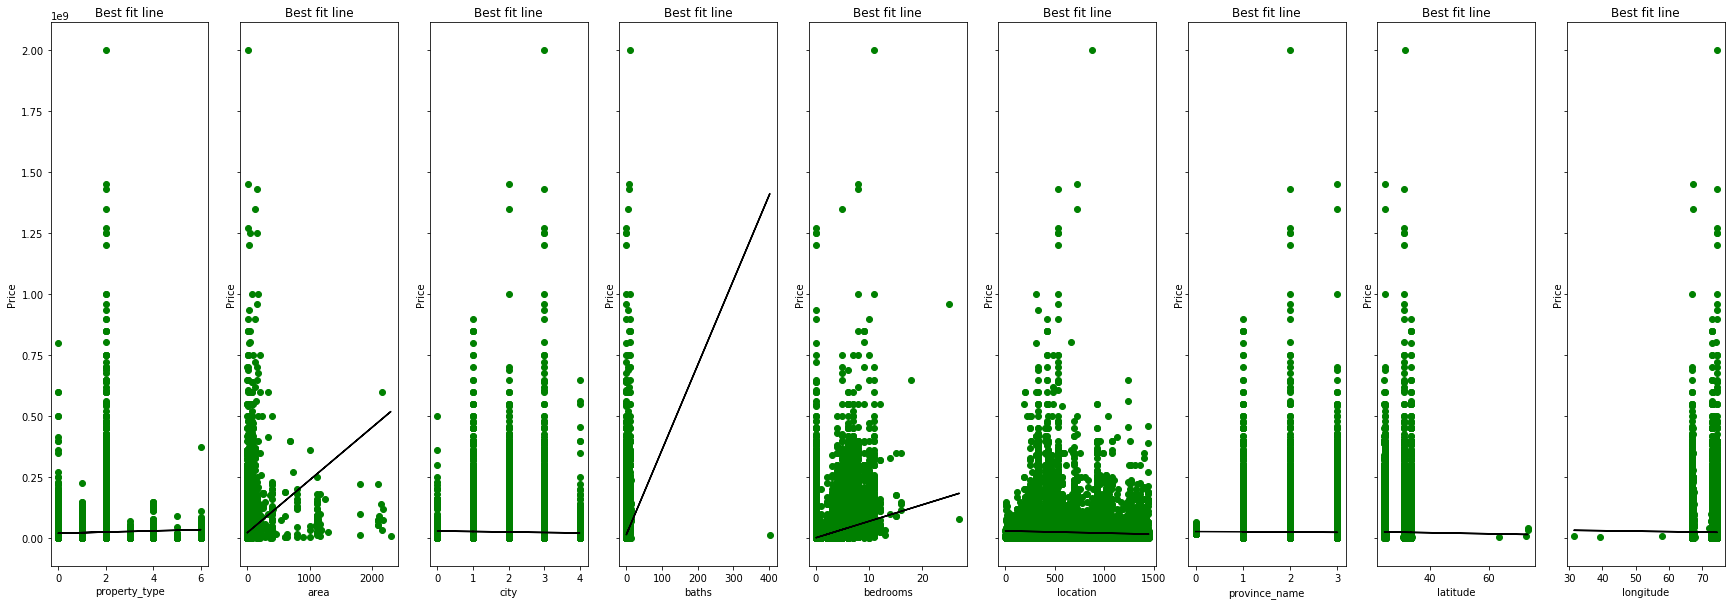

In [107]:
# Plotting scatter plots for different features against price of housing dataset
fig, axes = plt.subplots(1,len(X.columns.values),sharey=True,constrained_layout=False,figsize=(30,10))

for i,e in enumerate(X.columns):
  lasso.fit(X[e].values[:,np.newaxis], Y.values)
  axes[i].set_title("Best fit line")
  axes[i].set_xlabel(str(e))
  axes[i].set_ylabel('Price')
  axes[i].scatter(X[e].values[:,np.newaxis], Y,color='g')
  axes[i].plot(X[e].values[:,np.newaxis], 
  lasso.predict(X[e].values[:,np.newaxis]),color='k')